In [24]:
import sys

sys.path.append("../python")

In [25]:
import utils
reload(utils)

<module 'utils' from '../python/utils.py'>

In [26]:
emb_dict = utils.load_glove_embedding(utils.glove_embedding_path(25))

In [27]:
df = utils.load_all_tweets("../data/raw")

df.columns

Index(['id', 'lang', 'retweet_count', 'retweeted', 'text', 'truncated',
       'user/name'],
      dtype='object')

In [28]:
non_words  = '🤖👌➡️➡️👉🤖🎓🌐🚀💻\u2066😎\xa0👩\u200d🏫🎬💻🤖🌐🎓🚀\u2069™✨\U0001f9e0\u200b💪😍🤓🎉🚀🚀👋🔹👉👉✍🏽🌟✨🏆🎉👾😃✅'
non_words += '🌐☞☞😷\xa0\xa0\xa0👇😁😁😁👏——🔗📽️⚡️⚡️👍——🙏🏻🙌🏼❤️🚀🤓☞\xa0🍷👉🖥️💡🔸👏👏👏✌😉☞💵☺️🤜🤛💪🇬🇧🇨🇦🚀🎥😬👌🏼🍸🇬🇷💙☞\xa0😳👊👏📸▶️🎊'
non_words += '✨📊📉🌱💙📺😇\xa0—👁📊☞👉🏽🚀🌳👩🏽\u200d🏫🌊👨🏻\u200d🌾📚✏️💕\U0001f970🙋'
non_words += '🏻\u200d♂️🙌🏼👍🏼#\U0001f9fb💪➱➱–📝👊🏻🤷🏽\u200d♂️🍁✍️🤖\U0001f928📊📈✨🌟🏆🎉️⃣️⃣✔🔝《⚡⏱✈️🤔\U0001f928🤔¡⠀👉'
non_words += '\u2063\u2063\u2063\u2063☞–💻🤔☞🇯🇵🇮🇳👏🏽–🎉❤️🎓🏛️🤔✈️👉\u200a—\u200a✒️\xa0😍😬🌐😊😁😍👀☞❤️\U0001f929✨🔑🤖🤖🎓🏡🤝📽😎🚨🚨🤖🚖—》💥💥🔥🏙🔥'
non_words += '🔲´🖼😂😏💚💜💜🌍😲📒📋🥇👑💎\u3000📣🕴🚚💰🦈🙂💧🍅🍎🍐🍊🥑🍉🍇🏎📖💯💯🤣🐵📣🔖\U0001f9fe📑\xad\xad😆🎡📢📷💁😮😲😂😂😂😀🎂🥗🎙⚽„😭😭😭😭💃💫'
non_words += '😧⤵🍳🔟'
non_words = non_words.replace("#","").replace("&","")

pre_filters = non_words
post_filters='!"“”‘$%&()*+,-./:;=?@[\\]^_`{|}~…\t\n'

df["preproc_text"] = df["text"].apply(lambda x: utils.cleanup_text(x,pre_filters=pre_filters,post_filters=post_filters) )

In [29]:
df[["text","preproc_text"# ,"user/name"
    ,"truncated"
   ]].sample(20).values.tolist()

[['RT @IBMDb2: Use #IBM #Watson Machine Learning and Watson Studio to quickly build and prototype #machinelearning models: https://t.co/0E5ucj…',
  'RT <user> Use <hashtag> #ibm <hashtag> #watson Machine Learning and Watson Studio to quickly build and prototype <hashtag> #machinelearning models <trunc> <stop>',
  False],
 ['We need rigorous #5G testing before we get in the #driverless car\n https://t.co/iz3kNaNYsN\n#autonomous #SmartCity… https://t.co/qAjI9m1659',
  'We need rigorous #<number> G testing before we get in the <hashtag> #driverless car <url> <hashtag> #autonomous <trunc> <url> <stop>',
  True],
 ["RT @bigdataconf: https://t.co/faPBwsew3a Raises $11M to Decode the World's Unstructured Data https://t.co/yVD1tu75Fz #ArtificialIntelligenc…",
  'RT <user> <url> Raises <number> M to Decode the World s Unstructured Data <url> <trunc> <stop>',
  False],
 ['RT @jackcoleman219: #Robots + #IIoT expediting competitive advantage with #advancedmanufacturing &gt;&gt;&gt; @raconteur via 

In [30]:
df.to_hdf("../data/preproc/tweets.hd5","tweets")

In [31]:
from keras.preprocessing.text import Tokenizer

In [32]:
tk = Tokenizer(filters="", # already applied
               lower=True,
               split=" ")
tk.fit_on_texts(df["preproc_text"])

In [33]:
list( tk.word_index.items() )[:20]

[('<hashtag>', 1),
 ('<user>', 2),
 ('<stop>', 3),
 ('<trunc>', 4),
 ('rt', 5),
 ('<url>', 6),
 ('the', 7),
 ('to', 8),
 ('#machinelearning', 9),
 ('#ai', 10),
 ('<number>', 11),
 ('gt', 12),
 ('and', 13),
 ('of', 14),
 ('in', 15),
 ('for', 16),
 ('a', 17),
 ('is', 18),
 ('learning', 19),
 ('on', 20)]

In [34]:
list( tk.word_index.keys() )[:20]

['<hashtag>',
 '<user>',
 '<stop>',
 '<trunc>',
 'rt',
 '<url>',
 'the',
 'to',
 '#machinelearning',
 '#ai',
 '<number>',
 'gt',
 'and',
 'of',
 'in',
 'for',
 'a',
 'is',
 'learning',
 'on']

Text(0,0.5,'fraction of words in corpus')

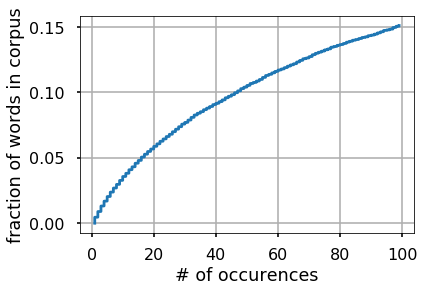

In [35]:
pdf = np.array(list(map(lambda x: x[1], sorted( tk.word_counts.items(), key=lambda x: x[1], reverse=True)))).astype(np.float)
cdf = pdf.cumsum()
# pdf //= cdf[-1]
cdf /= cdf[-1]
 
plt.plot( pdf[pdf<100],1-cdf[pdf<100] )
# plt.plot( cdf[pdf<10] )
plt.grid()
plt.xlabel("# of occurences")
plt.ylabel("fraction of words in corpus")


In [55]:
threshold = 0.90
max_words = int( np.ceil( (cdf>threshold).argmax() / 100) * 100 )

print( "Fraction of corpus: {}.\nFraction of dictionary: {} / {}.\nMax ingored occurence: {} " .format(threshold, max_words, len(tk.word_index), pdf[max_words]) )

Fraction of corpus: 0.9.
Fraction of dictionary: 1600 / 16035.
Max ingored occurence: 45.0 


In [37]:
# max_words = 1700
missing,hashtags = utils.get_uknown_words(tk.word_index,emb_dict,max_words)


In [38]:
list(filter(lambda x: "<" in x[0] or ">" in x[0],missing))


[('<stop>', 3), ('<trunc>', 4)]

In [39]:
len(missing), len(hashtags), max_words

(34, 155, 1551)

In [40]:
import re
non_words = map(lambda x: re.sub("\w","",x[0]), missing)

non_words = list(non_words)

''.join(non_words).replace("#","")

'<><>’’’'

In [41]:
missing[:20]

[('<stop>', 3),
 ('<trunc>', 4),
 ('vanloon', 174),
 ('deeplearn007', 254),
 ('mikequindazzi', 265),
 ('neurips', 325),
 ('tensorflow', 492),
 ('spirosmargaris', 575),
 ('nodexl', 583),
 ('jimmarous', 620),
 ('convolutional', 623),
 ('datax', 700),
 ('chatbot', 888),
 ('yape', 902),
 ('ipfconline1', 970),
 ('probabilistic', 1013),
 ('variational', 1020),
 ('machinelearning', 1041),
 ('pineau', 1065),
 ('chatbots', 1097)]

In [42]:
sequences = tk.texts_to_sequences(df["preproc_text"])

In [43]:
id_to_hash = { x[1] : x[0] for x in hashtags }#+missing  }

def hashtags_from_seq(seq):   
    return filter(lambda y: y is not None, map(lambda x: id_to_hash.get(x,None), seq))
        
hastags_seqs = map(lambda x: " ".join(list(hashtags_from_seq(x))), sequences)    

with open("../data/preproc/hash_corpus.txt","w+") as co:
    co.write( "\n".join(list(filter(lambda x: len(x)>0,hastags_seqs))))